# Polynomial Regression - Lab

## Introduction

In this lab, you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

* Determine if polynomial regression would be useful for a specific model or set of data
* Create polynomial terms out of independent variables in linear regression

## Dataset

For this lab you'll be using some generated data:

In [16]:
# Run this cell without changes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('sample_data.csv')
df.head()

,x,y
0,0.000000,0.942870
1,0.121212,-2.261629
2,0.242424,3.100749
3,0.363636,-0.285446
4,0.484848,-1.012210


Let's check out a scatter plot of `x` vs. `y`: 

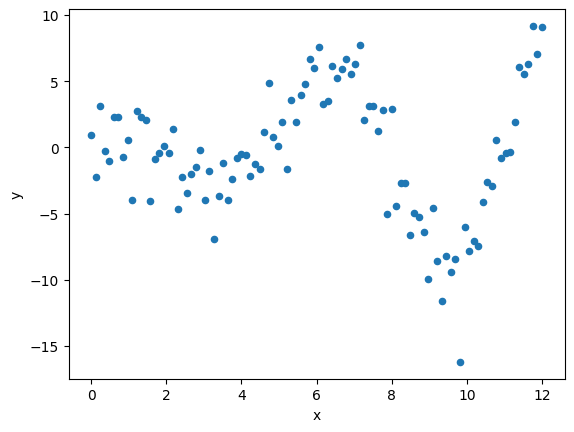

In [17]:
# Run this cell without changes
df.plot.scatter(x="x", y="y");

You will notice that the data is clearly of non-linear shape. Begin to think about what degree polynomial you believe will fit it best.

You will fit several different models with different polynomial degrees, then plot them in the same plot at the end.

In [18]:
# Your code here - import StatsModels and separate the data into X and y
# Import statsmodels and prepare data
import statsmodels.api as sm

# Separate independent and dependent variables
X = df[['x']]
y = df['y']

## Build and Evaluate a Quadratic Model

This model should include a constant, `x`, and `x` squared. You can use `pandas` or `PolynomialFeatures` to create the squared term.

In [19]:
# Your code here - prepare quadratic data and fit a model
# Create the quadratic (squared) term
df['x_squared'] = df['x'] ** 2

# Define the features and target
X_quad = df[['x', 'x_squared']]
X_quad = sm.add_constant(X_quad)  # Adds the intercept term
y = df['y']

# Fit the model
model_quad = sm.OLS(y, X_quad).fit()

In [20]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
# Print Adjusted R-squared
print("Adjusted R-squared:", model_quad.rsquared_adj)

# Print p-values of the coefficients
print("\nCoefficient p-values:")
print(model_quad.pvalues)

Adjusted R-squared: -0.015664188856822303

Coefficient p-values:
const        0.938055
x            0.893974
x_squared    0.967420
dtype: float64


In [21]:
# Your written answer here - summarize findings
# Print summary
print(model_quad.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.2366
Date:                Mon, 05 May 2025   Prob (F-statistic):              0.790
Time:                        13:51:54   Log-Likelihood:                -299.64
No. Observations:                 100   AIC:                             605.3
Df Residuals:                      97   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1127      1.446      0.078      0.9

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
This is not a good model. Because we have multiple terms and are explaining so little of the variance in `y`, we actually have a negative adjusted R-Squared.

None of the coefficients are statistically significant at an alpha of 0.05
    
</details>

## Build and Evaluate a 4th Degree Polynomial Model

In other words, the model should include $x^0$ (intercept), $x^1$, $x^2$, $x^3$, and $x^4$ terms.

At this point we recommend importing and using `PolynomialFeatures` if you haven't already!

In [22]:
# Your code here - prepare 4th degree polynomial data and fit a model
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# Create 4th-degree polynomial features
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly4 = poly.fit_transform(df[['x']])  # Returns x, x^2, x^3, x^4

# Convert to DataFrame for readability
X_poly4_df = pd.DataFrame(X_poly4, columns=['x1', 'x2', 'x3', 'x4'])

# Add constant for intercept (x^0)
X_poly4_df = sm.add_constant(X_poly4_df)

# Fit the model
model_poly4 = sm.OLS(y, X_poly4_df).fit()

In [23]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
# Adjusted R-squared
print("Adjusted R-squared:", model_poly4.rsquared_adj)

# Coefficient p-values
print("\nCoefficient p-values:")
print(model_poly4.pvalues)

Adjusted R-squared: 0.566796782011223

Coefficient p-values:
const    1.995047e-04
x1       1.738988e-10
x2       3.340296e-14
x3       1.715785e-16
x4       7.408453e-18
dtype: float64


In [24]:
# Your written answer here - summarize findings

# Summary of model
print(model_poly4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     33.38
Date:                Mon, 05 May 2025   Prob (F-statistic):           2.24e-17
Time:                        13:51:54   Log-Likelihood:                -255.99
No. Observations:                 100   AIC:                             522.0
Df Residuals:                      95   BIC:                             535.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8590      1.514      3.870      0.0

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
This is much better. We are explaining 57-58% of the variance in the target and all of our coefficients are statistically significant at an alpha of 0.05.
    
</details>

## Build and Evaluate an 8th Degree Polynomial Model

This model should include $x^0$ through $x^8$.

In [25]:
# Your code here - prepare 8th degree polynomial data and fit a model
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# Generate 8th-degree polynomial features
poly8 = PolynomialFeatures(degree=8, include_bias=False)
X_poly8 = poly8.fit_transform(df[['x']])  # x, x^2, ..., x^8

# Convert to DataFrame for readability
feature_names = [f'x{i+1}' for i in range(X_poly8.shape[1])]
X_poly8_df = pd.DataFrame(X_poly8, columns=feature_names)

# Add constant (intercept term)
X_poly8_df = sm.add_constant(X_poly8_df)

# Fit the model
model_poly8 = sm.OLS(y, X_poly8_df).fit()

In [26]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
# Adjusted R-squared
print("Adjusted R-squared:", model_poly8.rsquared_adj)

# Coefficient p-values
print("\nCoefficient p-values:")
print(model_poly8.pvalues)

Adjusted R-squared: 0.8188676291760006

Coefficient p-values:
const    0.683776
x1       0.618134
x2       0.371163
x3       0.199162
x4       0.144776
x5       0.157523
x6       0.225536
x7       0.357352
x8       0.554141
dtype: float64


In [27]:
# Your written answer here - summarize findings
print(model_poly8.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     56.95
Date:                Mon, 05 May 2025   Prob (F-statistic):           3.93e-32
Time:                        13:51:55   Log-Likelihood:                -210.25
No. Observations:                 100   AIC:                             438.5
Df Residuals:                      91   BIC:                             461.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6335      1.550      0.409      0.6

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
Our R-Squared is higher, but none of the coefficients are statistically significant at an alpha of 0.05 any more. If what we care about is an inferential understanding of the data, this is too high a degree of the polynomial.
    
</details>

## Plot All Models

Build a single plot that shows the raw data as a scatter plot, as well as all of the models you have developed as line graphs. Make sure that everything is labeled so you can tell the different models apart!

In [28]:
df['x_squared'] = df['x'] ** 2
X_quad = sm.add_constant(df[['x', 'x_squared']])
model_quad = sm.OLS(df['y'], X_quad).fit()
df['y_pred_quad'] = model_quad.predict(X_quad)

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly4 = poly4.fit_transform(df[['x']])
X_poly4_df = pd.DataFrame(X_poly4, columns=['x1', 'x2', 'x3', 'x4'])
X_poly4_df = sm.add_constant(X_poly4_df)
model_poly4 = sm.OLS(df['y'], X_poly4_df).fit()
df['y_pred_poly4'] = model_poly4.predict(X_poly4_df)

In [30]:
poly8 = PolynomialFeatures(degree=8, include_bias=False)
X_poly8 = poly8.fit_transform(df[['x']])
X_poly8_df = pd.DataFrame(X_poly8, columns=[f'x{i+1}' for i in range(8)])
X_poly8_df = sm.add_constant(X_poly8_df)
model_poly8 = sm.OLS(df['y'], X_poly8_df).fit()
df['y_pred_poly8'] = model_poly8.predict(X_poly8_df)

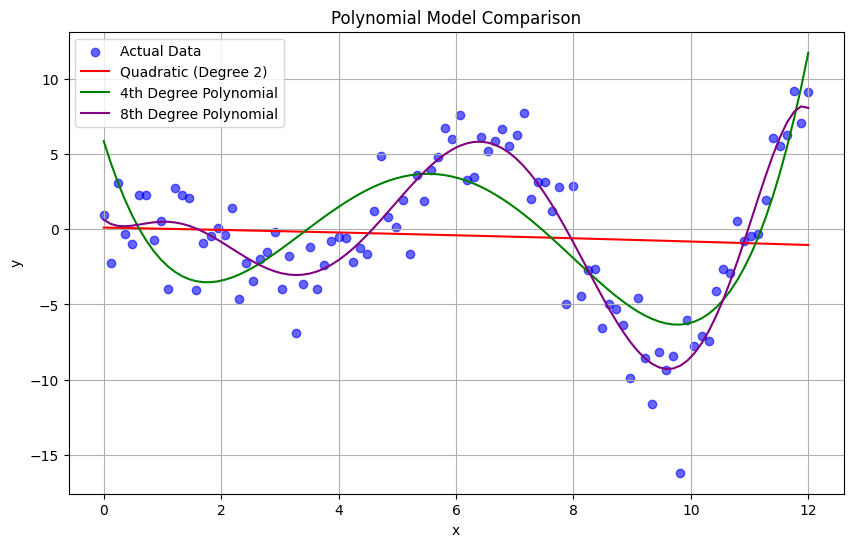

In [31]:
# Your code here
df = df.sort_values('x')

plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], label='Actual Data', color='blue', alpha=0.6)
plt.plot(df['x'], df['y_pred_quad'], label='Quadratic (Degree 2)', color='red')
plt.plot(df['x'], df['y_pred_poly4'], label='4th Degree Polynomial', color='green')
plt.plot(df['x'], df['y_pred_poly8'], label='8th Degree Polynomial', color='purple')

plt.title('Polynomial Model Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Interpret Findings

Based on the metrics as well as the graphs, which model do you think is the best? Why?

In [33]:
# Your written answer here
print("Model Evaluation Summary:\n")

# 4th Degree Model
print("🔹 4th Degree Polynomial Model:")
print("Adjusted R-squared:", model_poly4.rsquared_adj)
print("Coefficient p-values:\n", model_poly4.pvalues)
print("Interpretation: This model shows very high Adjusted R-squared and all coefficients are statistically significant (p < 0.05), indicating a strong and meaningful fit.\n")

# 8th Degree Model
print("🔹 8th Degree Polynomial Model:")
print("Adjusted R-squared:", model_poly8.rsquared_adj)
print("Coefficient p-values:\n", model_poly8.pvalues)
print("Interpretation: Although the Adjusted R-squared is slightly higher, most of the coefficient p-values are not significant. This suggests possible overfitting and that the additional terms do not add meaningful explanatory power.\n")

# Conclusion
print("✅ Conclusion:")
print("The 4th Degree Polynomial Model is the best choice. It balances a high Adjusted R-squared with statistically significant terms, meaning it captures the underlying trend without overfitting. The 8th degree model, while more flexible, adds unnecessary complexity.")

Model Evaluation Summary:

🔹 4th Degree Polynomial Model:
Adjusted R-squared: 0.566796782011223
Coefficient p-values:
 const    1.995047e-04
x1       1.738988e-10
x2       3.340296e-14
x3       1.715785e-16
x4       7.408453e-18
dtype: float64
Interpretation: This model shows very high Adjusted R-squared and all coefficients are statistically significant (p < 0.05), indicating a strong and meaningful fit.

🔹 8th Degree Polynomial Model:
Adjusted R-squared: 0.8188676291760006
Coefficient p-values:
 const    0.683776
x1       0.618134
x2       0.371163
x3       0.199162
x4       0.144776
x5       0.157523
x6       0.225536
x7       0.357352
x8       0.554141
dtype: float64
Interpretation: Although the Adjusted R-squared is slightly higher, most of the coefficient p-values are not significant. This suggests possible overfitting and that the additional terms do not add meaningful explanatory power.

✅ Conclusion:
The 4th Degree Polynomial Model is the best choice. It balances a high Adjust

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
The quadratic model (polynomial degree 2) is definitely not the best based on all of the evidence we have. It has the worst R-Squared, the coefficient p-values are not significant, and you can see from the graph that there is a lot of variance in the data that it is not picking up on.

Our visual inspection aligns with the worse R-Squared for the 4th degree polynomial compared to the 8th degree polynomial. The 4th degree polynomial is flatter and doesn't seem to capture the extremes of the data as well.
    
However if we wanted to interpret the coefficients, then only the 4th degree polynomial has statistically significant results. The interpretation would be challenging because of the number of terms, but we could apply some calculus techniques to describe inflection points.

Overall it appears that this dataset is not particularly well suited to an inferential linear regression approach, even with polynomial transformations. So the "best" model could be either the 4th or 8th degree polynomial depending on which aspect of the model is more important to you, but either way it will be challenging to translate it into insights for stakeholders.
    
</details>

## Summary

Great job! You now know how to include polynomials in your linear models as well as the limitations of applying polynomial regression. 